In [244]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from datetime import datetime 
import time
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [245]:
test = pd.read_csv('test.csv') 
train = pd.read_csv('train.csv')
sample = pd.read_csv('sample.csv')

In [246]:
test

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,31.000000,blue-collar,married,secondary,0,152.0,1,1,cellular,8,jul,1,-1,0,NaN,16:28:02,16:41:53
931,30.000000,technician,single,secondary,0,53.0,1,0,cellular,18,jul,5,-1,0,NaN,15:31:18,15:37:10
932,42.000000,management,married,tertiary,0,36.0,0,0,cellular,21,nov,3,-1,0,NaN,11:38:43,11:49:47
933,46.000000,services,married,secondary,0,2948.0,0,0,cellular,21,nov,1,-1,0,NaN,13:17:55,13:32:48


In [247]:
def datasplit(col):
    plt.figure(figsize = (16,8))
    ax = sns.countplot(x = df[col], hue = df['source'])
def insight(col):
    plt.figure(figsize = (16,8))
    ax = sns.countplot(x = df[col], hue = df['car_insurance'])
def explain(col):
    print(df[col].nunique())
    print(df[col].value_counts())
    print(df[col].isnull().sum())

In [248]:
test['source'] = 'test'
train['source'] = 'train'

In [249]:
df = pd.concat([train, test])

In [250]:
df = df.reset_index()

In [251]:
del df['index']

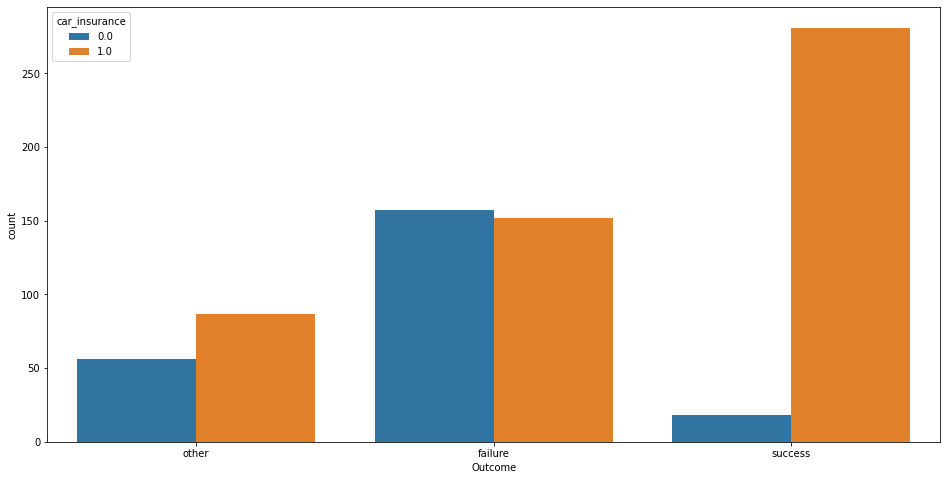

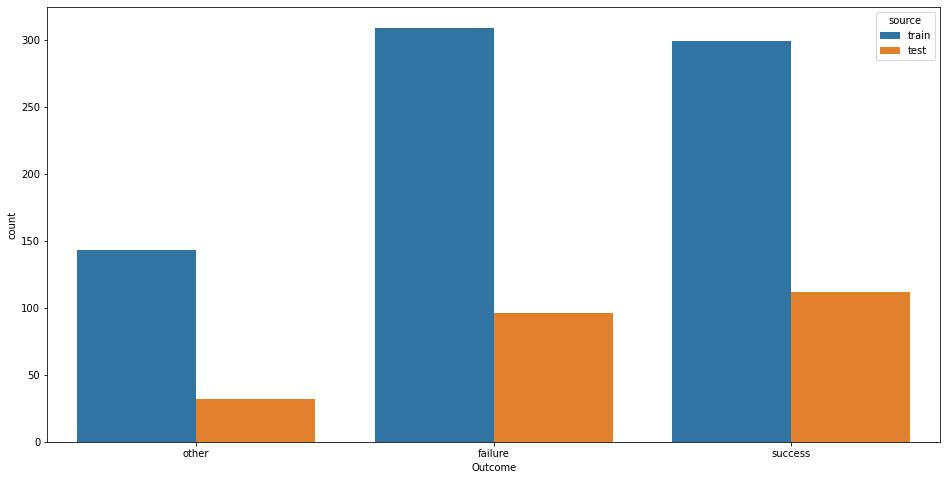

In [252]:
insight('Outcome')
datasplit('Outcome')

In [99]:
explain('job_type')

11
management       1001
blue-collar       695
technician        687
admin.            450
services          283
retired           245
unemployed        179
student           154
self-employed     127
entrepreneur      105
housemaid          95
Name: job_type, dtype: int64
16


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4021 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      3890 non-null   object 
 4   default_or_not       4037 non-null   int64  
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   int64  
 7   car_loan             4037 non-null   int64  
 8   communication        3329 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  last_contact_month   4037 non-null   object 
 11  no_of_contacts       4037 non-null   int64  
 12  days_passed          4037 non-null   int64  
 13  prev_attempts        4037 non-null   int64  
 14  Outcome              991 non-null    object 
 15  call_start           4037 non-null   o

In [253]:
df['age'] = df['age'].astype(int)

In [254]:
df['job_type'] = df['job_type'].transform(lambda x: x.fillna('management'))

In [255]:
one = pd.get_dummies(df['job_type'])
 

In [256]:
one

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4032,0,1,0,0,0,0,0,0,0,0,0
4033,0,0,0,0,0,0,0,0,0,1,0
4034,0,0,0,0,1,0,0,0,0,0,0
4035,0,0,0,0,0,0,0,1,0,0,0


In [257]:
df

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance,source
0,47,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0.0,train
1,46,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1.0,train
2,36,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1.0,train
3,32,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1.0,train
4,30,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,31,blue-collar,married,secondary,0,152.000000,1,1,cellular,8,jul,1,-1,0,NaN,16:28:02,16:41:53,NaN,test
4033,30,technician,single,secondary,0,53.000000,1,0,cellular,18,jul,5,-1,0,NaN,15:31:18,15:37:10,NaN,test
4034,42,management,married,tertiary,0,36.000000,0,0,cellular,21,nov,3,-1,0,NaN,11:38:43,11:49:47,NaN,test
4035,46,services,married,secondary,0,2948.000000,0,0,cellular,21,nov,1,-1,0,NaN,13:17:55,13:32:48,NaN,test


In [258]:
df1 = pd.concat([df, one], axis = 1)

In [259]:
df1

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,47,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,...,1,0,0,0,0,0,0,0,0,0
1,46,management,married,tertiary,0,1.312372,0,1,cellular,15,...,0,0,0,1,0,0,0,0,0,0
2,36,services,single,NaN,0,281.000000,1,0,NaN,16,...,0,0,0,0,0,0,1,0,0,0
3,32,technician,single,secondary,0,540.000000,0,1,cellular,29,...,0,0,0,0,0,0,0,0,1,0
4,30,admin.,single,secondary,0,315.000000,1,0,cellular,14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,31,blue-collar,married,secondary,0,152.000000,1,1,cellular,8,...,1,0,0,0,0,0,0,0,0,0
4033,30,technician,single,secondary,0,53.000000,1,0,cellular,18,...,0,0,0,0,0,0,0,0,1,0
4034,42,management,married,tertiary,0,36.000000,0,0,cellular,21,...,0,0,0,1,0,0,0,0,0,0
4035,46,services,married,secondary,0,2948.000000,0,0,cellular,21,...,0,0,0,0,0,0,1,0,0,0


In [260]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   int32  
 1   job_type             4037 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      3890 non-null   object 
 4   default_or_not       4037 non-null   int64  
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   int64  
 7   car_loan             4037 non-null   int64  
 8   communication        3329 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  last_contact_month   4037 non-null   object 
 11  no_of_contacts       4037 non-null   int64  
 12  days_passed          4037 non-null   int64  
 13  prev_attempts        4037 non-null   int64  
 14  Outcome              991 non-null    object 
 15  call_start           4037 non-null   o

In [261]:
df1['marital_status'].value_counts()

married     2405
single      1178
divorced     454
Name: marital_status, dtype: int64

In [262]:
df1['marital_status'] = df1['marital_status'].replace({'married': 1, 'single': 0, 'divorced': 2})

In [263]:
df1['education_level'].value_counts()

secondary    2006
tertiary     1385
primary       499
Name: education_level, dtype: int64

In [264]:
df1['education_level'] = df1['education_level'].transform(lambda x: x.fillna('secondary'))

In [265]:
df1['education_level'] = df1['education_level'].replace({'secondary': 1, 'tertiary': 0, 'primary': 2})

In [266]:
df1['communication'].value_counts()

cellular     3107
telephone     222
Name: communication, dtype: int64

In [267]:
df1['communication'] = df1['communication'].transform(lambda x: x.fillna('cellular'))

In [268]:
df1['communication'] = np.where( df1['communication'] == 'cellular' , 1, 0)

In [269]:
df1['last_contact_month'].value_counts()

may    1007
aug     588
jul     525
jun     441
apr     371
nov     319
feb     275
oct     136
sep     131
jan     118
mar      85
dec      41
Name: last_contact_month, dtype: int64

In [270]:
df1['last_contact_month'] = df1['last_contact_month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may':5, 'jun': 6, 
                                                               'jul' : 7, 'aug' : 8, 'sep':9, 'oct':10,'nov':11, 'dec':12})

In [271]:
df1['Outcome']  = np.where(df1['Outcome'] == 'success', 1, 0)

In [272]:
df1['Outcome'].value_counts()

0    3626
1     411
Name: Outcome, dtype: int64

In [275]:
df1[['Hour1','Min11', 'Sec1']] = df1['call_start'].str.split(":",expand=True)

In [277]:
df1[['Hour2','Min2', 'Sec2']] = df1['call_end'].str.split(":",expand=True)

In [278]:
del df1['call_end'], df1['call_start']

In [282]:
df1.Hour1 = df1.Hour1.astype(int)
df1.Hour2 = df1.Hour2.astype(int)
df1.Min11 = df1.Min11.astype(int)
df1.Min2 = df1.Min2.astype(int)
df1.Sec2 = df1.Sec2.astype(int)
df1.Sec1 = df1.Sec1.astype(int)




In [284]:
df1['Hour'] = df1['Hour2'] - df1['Hour1']
df1['Min'] = df1['Min2'] - df1['Min11']
df1['Sec'] = df1['Sec2'] - df1['Sec1']

In [288]:
del df1['Hour1'], df1['Hour2'], df1['Min11'], df1['Min2'], df1['Sec1'],  df1['Sec2']

In [289]:
dtest = df1[df1['source'] == 'test']
dtrain = df1[df1['source'] == 'train']

In [203]:
dtest.columns

Index(['age', 'marital_status', 'education_level', 'default_or_not',
       'balance_amt', 'household_insurance', 'car_loan', 'communication',
       'last_contact_day', 'last_contact_month', 'no_of_contacts',
       'days_passed', 'prev_attempts', 'Outcome', 'car_insurance', 'source',
       'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'],
      dtype='object')

In [290]:
del dtest['car_insurance']

In [291]:
del dtest['source']
del dtrain['source']

In [300]:
del dtest['job_type']
del dtrain['job_type']

In [292]:
y = dtrain.pop('car_insurance')

In [293]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3097    0.0
3098    0.0
3099    1.0
3100    1.0
3101    1.0
Name: car_insurance, Length: 3102, dtype: float64

In [294]:
y = y.astype(int)

In [295]:
y

0       0
1       1
2       1
3       1
4       1
       ..
3097    0
3098    0
3099    1
3100    1
3101    1
Name: car_insurance, Length: 3102, dtype: int32

In [296]:
dtrain.balance_amt.value_counts()

 0.000000       207
 2.000000         9
 210.000000       7
-1.000000         7
 10.000000        7
               ... 
 1169.000000      1
 2868.445702      1
 145.583736       1
 7631.000000      1
 3360.136101      1
Name: balance_amt, Length: 2004, dtype: int64

In [301]:
sc = StandardScaler()

In [302]:
strain = sc.fit_transform(dtrain)
stest = sc.transform(dtest)

In [303]:
strain

array([[ 0.50047174,  0.30168244,  1.87211424, ..., -0.20515482,
         0.11649142,  0.37008663],
       [ 0.41365464,  0.30168244, -1.2317331 , ...,  1.71602329,
         2.75677444,  0.73283208],
       [-0.45451633, -1.3517079 ,  0.32019057, ..., -0.20515482,
         0.47888321, -1.00028506],
       ...,
       [ 0.84774013,  0.30168244, -1.2317331 , ..., -0.20515482,
         0.27180219, -1.32272546],
       [ 1.71591111,  0.30168244,  1.87211424, ...,  0.27513971,
        -2.62733211,  0.89405228],
       [ 1.02137433,  0.30168244,  0.32019057, ..., -0.20515482,
         0.68596423,  0.04764623]])

In [304]:
stest

array([[ 2.0631795 ,  0.30168244,  0.32019057, ..., -0.20515482,
         0.42711295,  1.74045833],
       [-0.45451633,  0.30168244, -1.2317331 , ...,  0.27513971,
        -2.67910237, -0.19418407],
       [-0.36769924,  0.30168244, -1.2317331 , ..., -0.20515482,
         0.27180219,  1.49862803],
       ...,
       [ 0.06638625,  0.30168244, -1.2317331 , ..., -0.20515482,
         0.58242372,  0.16856138],
       [ 0.41365464,  0.30168244,  0.32019057, ..., -0.20515482,
         0.78950474, -0.27479417],
       [ 1.10819142,  0.30168244,  0.32019057, ...,  0.27513971,
        -2.67910237,  1.61954318]])

In [305]:
Mn = GaussianNB()
Mn.fit(strain , y)
Mnpred = Mn.predict(stest)
Mntrain = Mn.predict(strain)
accuracy_score(y, Mntrain)

0.7114764667956157

In [314]:
rf = RandomForestClassifier()
rf.fit(strain , y)
rfpred = rf.predict(stest)
rftrain = rf.predict(strain)
accuracy_score(y, rftrain)

1.0

In [236]:
rfpred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [307]:
sample

,prediction
0,1
1,1
2,1
3,1
4,1
...,...
930,1
931,1
932,1
933,1


In [315]:
sample['prediction'] = rfpred

In [316]:
sample.to_csv('out2.csv')

In [310]:
rf = LogisticRegression()
rf.fit(strain , y)
rfpred = rf.predict(stest)
rftrain = rf.predict(strain)
accuracy_score(y, rftrain)

0.657317859445519

In [311]:
rf = BernoulliNB()
rf.fit(strain , y)
rfpred = rf.predict(stest)
rftrain = rf.predict(strain)
accuracy_score(y, rftrain)

0.6934235976789168